# Time Series Analysis - NYPD Shooting Incidents

### - Bassam Atheeque
---

### Dataset: NYPD shooting incident data from [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8)

In [1]:
# Importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data from the NYPD link

NYPD = pd.read_csv('https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD')

In [3]:
NYPD.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,10/06/2019,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,09/04/2011,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,05/27/2013,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)


In [4]:
NYPD.shape

(23585, 19)

In [5]:
NYPD.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

### Using the pandas `to_datetime()` function to create a new column with the complete date and time information of each shooting incident:

In [6]:
#Creating new column that combines date and time information:
NYPD['datetime'] = NYPD['OCCUR_DATE'] + ' ' + NYPD['OCCUR_TIME']

NYPD.head(1)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003),08/27/2006 05:35:00


In [7]:
#Changing to official datetime format
NYPD['new_DateTime'] = pd.to_datetime( NYPD['datetime'], format = '%m/%d/%Y %H:%M:%S', errors='coerce')
NYPD.head(1)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime,new_DateTime
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,...,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003),08/27/2006 05:35:00,2006-08-27 05:35:00


### Setting new DateTime as the index:

In [8]:
NYPD.set_index('new_DateTime', inplace = True)

NYPD.head(1)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime
new_DateTime,,,,,,,,,,,,,,,,,,,,
2006-08-27 05:35:00,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003),08/27/2006 05:35:00


In [9]:
#Sorting the incidents in chronological order:

NYPD.sort_index(ascending=True, inplace=True)

In [10]:
#Printing first few rows:

NYPD.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime
new_DateTime,,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,02:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1.013405e+06,251800.750000,40.857770,-73.894607,POINT (-73.89460745999997 40.85776982200008),01/01/2006 02:00:00
2006-01-01 02:22:00,9953252,01/01/2006,02:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,9.988158e+05,233545.437500,40.807700,-73.947386,POINT (-73.94738575999997 40.80770036400003),01/01/2006 02:22:00
2006-01-01 02:34:00,9953250,01/01/2006,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),01/01/2006 02:34:00
2006-01-01 02:34:00,9953250,01/01/2006,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,BLACK,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),01/01/2006 02:34:00
2006-01-01 03:30:00,9953247,01/01/2006,03:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,9.993160e+05,176460.000000,40.651014,-73.945707,POINT (-73.94570651699996 40.65101399800005),01/01/2006 03:30:00


In [11]:
#Printing last few rows:

NYPD.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime
new_DateTime,,,,,,,,,,,,,,,,,,,,
2020-12-30 11:39:00,222416923,12/30/2020,11:39:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.002882e+06,181672.375000,40.665314,-73.932841,POINT (-73.93284140199995 40.66531403600004),12/30/2020 11:39:00
2020-12-31 00:42:00,222446417,12/31/2020,00:42:00,BRONX,44,0.0,SMALL MERCHANT,False,NaN,NaN,NaN,25-44,M,WHITE HISPANIC,1.009943e+06,244586.390625,40.837979,-73.907148,POINT (-73.90714754299995 40.83797929000008),12/31/2020 00:42:00
2020-12-31 14:59:00,222468112,12/31/2020,14:59:00,QUEENS,103,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,1.040590e+06,191768.156250,40.692865,-73.796836,POINT (-73.79683591199995 40.69286495400007),12/31/2020 14:59:00
2020-12-31 19:27:00,222466833,12/31/2020,19:27:00,QUEENS,113,0.0,NaN,True,NaN,NaN,NaN,25-44,M,BLACK,1.041343e+06,189493.562500,40.686617,-73.794141,POINT (-73.79414095299995 40.686616910000055),12/31/2020 19:27:00
2020-12-31 23:45:00,222473262,12/31/2020,23:45:00,MANHATTAN,33,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK HISPANIC,9.999233e+05,244406.562500,40.837509,-73.943360,POINT (-73.94335955899999 40.83750918100003),12/31/2020 23:45:00


#### Creating a new column to show the incident's day of the week:

In [12]:
#creating a column with day of the week
NYPD['Day'] = NYPD.index.strftime('%a')

NYPD.head(10)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime,Day
new_DateTime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,02:00:00,BRONX,48,0.0,NONE,False,18-24,M,...,<18,M,BLACK,1.013405e+06,251800.750000,40.857770,-73.894607,POINT (-73.89460745999997 40.85776982200008),01/01/2006 02:00:00,Sun
2006-01-01 02:22:00,9953252,01/01/2006,02:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,...,25-44,M,BLACK,9.988158e+05,233545.437500,40.807700,-73.947386,POINT (-73.94738575999997 40.80770036400003),01/01/2006 02:22:00,Sun
2006-01-01 02:34:00,9953250,01/01/2006,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,...,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),01/01/2006 02:34:00,Sun
2006-01-01 02:34:00,9953250,01/01/2006,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,...,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,POINT (-73.93383258499995 40.77486094100004),01/01/2006 02:34:00,Sun
2006-01-01 03:30:00,9953247,01/01/2006,03:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,...,18-24,M,BLACK,9.993160e+05,176460.000000,40.651014,-73.945707,POINT (-73.94570651699996 40.65101399800005),01/01/2006 03:30:00,Sun
2006-01-01 05:51:00,9953246,01/01/2006,05:51:00,BRONX,44,0.0,NONE,False,25-44,M,...,18-24,M,WHITE HISPANIC,1.007418e+06,243859.218750,40.835990,-73.916276,POINT (-73.91627635899994 40.83599040100006),01/01/2006 05:51:00,Sun
2006-01-01 12:30:00,139716503,01/01/2006,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,...,25-44,M,BLACK,9.964416e+05,184160.359375,40.672154,-73.956052,POINT (-73.95605150499995 40.67215420900004),01/01/2006 12:30:00,Sun
2006-01-01 19:00:00,9953248,01/01/2006,19:00:00,QUEENS,106,0.0,NONE,False,18-24,M,...,18-24,M,BLACK,1.028605e+06,187929.500000,40.682397,-73.840081,POINT (-73.84008072399996 40.68239691900004),01/01/2006 19:00:00,Sun
2006-01-02 00:49:00,9953249,01/02/2006,00:49:00,BROOKLYN,90,2.0,MULTI DWELL - PUBLIC HOUS,True,UNKNOWN,U,...,25-44,M,BLACK,1.000067e+06,198310.781250,40.710988,-73.942948,POINT (-73.94294832599996 40.71098811600007),01/02/2006 00:49:00,Mon


### Data Analysis: Percentage of the shooting incidents that resulted in the victim’s death from the year 2015 to 2019 (both inclusive)

In [13]:
NYPD_15to19 = NYPD['2015':'2019']
NYPD_15to19.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,datetime,Day
new_DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:30:00,140396316,01/01/2015,01:30:00,STATEN ISLAND,123,0.0,GROCERY/BODEGA,False,25-44,M,...,25-44,M,BLACK HISPANIC,9.330204e+05,145192.296875,40.565055,-74.184386,POINT (-74.18438557799993 40.565055364000045),01/01/2015 01:30:00,Thu
2015-01-01 01:30:00,140396316,01/01/2015,01:30:00,STATEN ISLAND,123,0.0,GROCERY/BODEGA,False,25-44,M,...,25-44,M,BLACK HISPANIC,9.330204e+05,145192.296875,40.565055,-74.184386,POINT (-74.18438557799993 40.565055364000045),01/01/2015 01:30:00,Thu
2015-01-01 02:51:00,140396353,01/01/2015,02:51:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,...,25-44,M,BLACK,1.009769e+06,236748.078125,40.816466,-73.907806,POINT (-73.90780617899998 40.81646587100005),01/01/2015 02:51:00,Thu
2015-01-02 02:33:00,140398208,01/02/2015,02:33:00,QUEENS,107,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,...,25-44,M,BLACK,1.035760e+06,205381.578125,40.730260,-73.814147,POINT (-73.81414744299997 40.73025990900004),01/02/2015 02:33:00,Fri
2015-01-02 04:10:00,140397850,01/02/2015,04:10:00,BROOKLYN,63,0.0,NaN,False,18-24,M,...,25-44,M,BLACK,1.004302e+06,167786.500000,40.627197,-73.927764,POINT (-73.92776417899995 40.62719721200006),01/02/2015 04:10:00,Fri


In [14]:
# Total number of shootings that occured from the year 2015 to 2019 (both inclusive):

NYPD_15to19.shape[0]

5537

In [15]:
# Number of incidents that lead to victim's death 

NYPD_death = NYPD_15to19[NYPD_15to19['STATISTICAL_MURDER_FLAG']==True]
NYPD_death.shape[0]

1068

In [16]:
# percentage of the shooting incidents that resulted in the victim’s death

Perc_death = round(((NYPD_death.shape[0]/NYPD_15to19.shape[0])*100),2)
Perc_death

19.29

### 19.29% shooting incidents resulted in the victim’s death.

### Resampling the data to show the **weekly** counts of the shooting incidents.

In [17]:
NYPD_weekly = NYPD.resample('W')['INCIDENT_KEY'].count()
NYPD_weekly

new_DateTime
2006-01-01     8
2006-01-08    26
2006-01-15    34
2006-01-22    37
2006-01-29    19
              ..
2020-12-06    27
2020-12-13    41
2020-12-20    25
2020-12-27    30
2021-01-03    13
Freq: W-SUN, Name: INCIDENT_KEY, Length: 784, dtype: int64

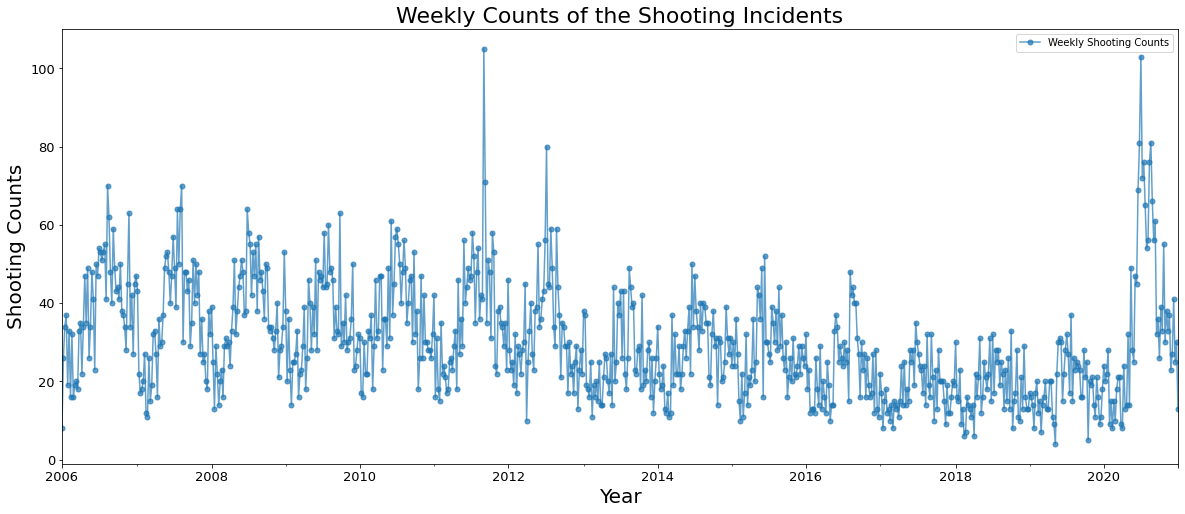

In [18]:
plt.figure(figsize = (20,8))

NYPD_weekly.plot(marker = 'o', markersize = 5, alpha = 0.7, label = 'Weekly Shooting Counts')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Shooting Counts', fontsize = 20)
plt.title('Weekly Counts of the Shooting Incidents', fontsize = 22)
plt.xticks (size = 13)
plt.yticks (size = 13)

plt.legend()
plt.show()

### Resampling the data to show the **monthly** counts of the shooting incidents.

In [19]:
NYPD_monthly = NYPD.resample('M')['INCIDENT_KEY'].count()
NYPD_monthly

new_DateTime
2006-01-31    129
2006-02-28     97
2006-03-31    102
2006-04-30    156
2006-05-31    173
             ... 
2020-08-31    311
2020-09-30    189
2020-10-31    165
2020-11-30    139
2020-12-31    132
Freq: M, Name: INCIDENT_KEY, Length: 180, dtype: int64

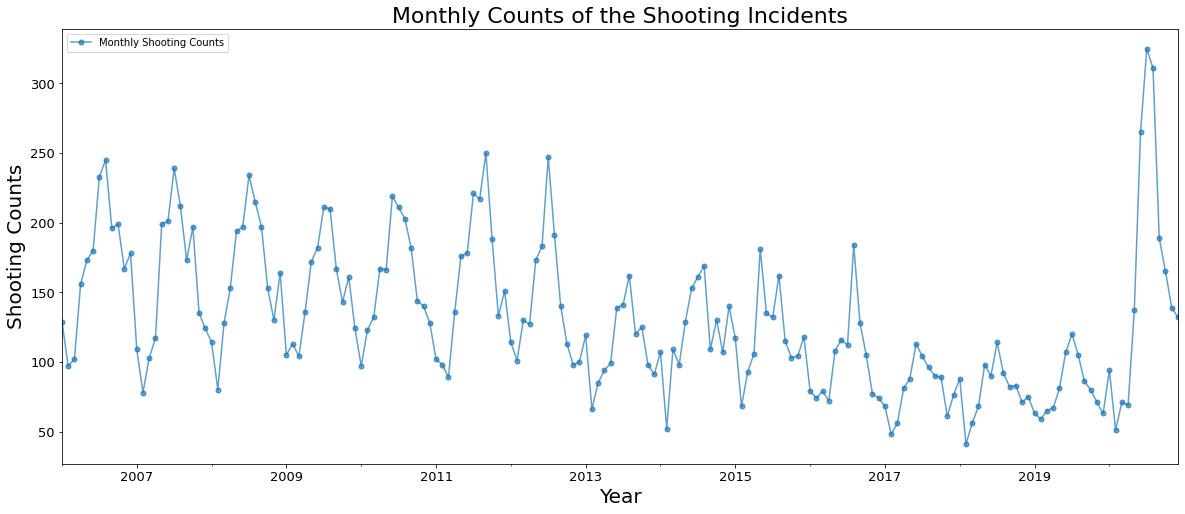

In [20]:
plt.figure(figsize = (20,8))

NYPD_monthly.plot(marker = 'o', markersize = 5, alpha = 0.7, label = 'Monthly Shooting Counts')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Shooting Counts', fontsize = 20)
plt.title('Monthly Counts of the Shooting Incidents', fontsize = 22)
plt.xticks (size = 13)
plt.yticks (size = 13)

plt.legend()
plt.show()

### Resampling the data to show the **year** counts of the shooting incidents.

In [21]:
NYPD_yearly = NYPD.resample('Y')['INCIDENT_KEY'].count()
NYPD_yearly

new_DateTime
2006-12-31    2055
2007-12-31    1887
2008-12-31    1959
2009-12-31    1828
2010-12-31    1912
2011-12-31    1939
2012-12-31    1717
2013-12-31    1339
2014-12-31    1464
2015-12-31    1434
2016-12-31    1208
2017-12-31     970
2018-12-31     958
2019-12-31     967
2020-12-31    1948
Freq: A-DEC, Name: INCIDENT_KEY, dtype: int64

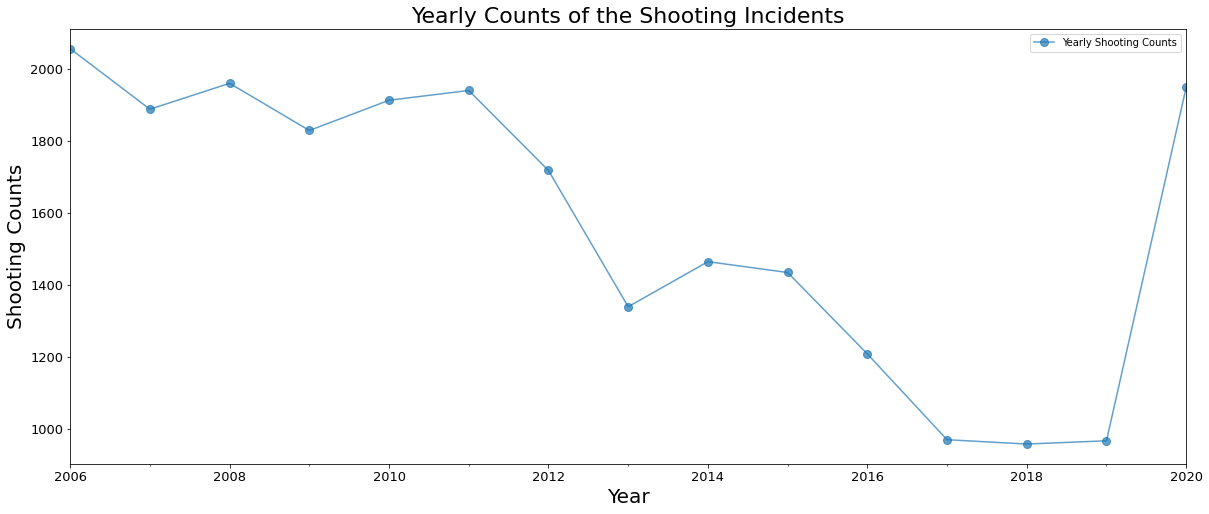

In [22]:
plt.figure(figsize = (20,8))

NYPD_yearly.plot(marker = 'o', markersize = 8, alpha = 0.7, label = 'Yearly Shooting Counts')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Shooting Counts', fontsize = 20)
plt.title('Yearly Counts of the Shooting Incidents', fontsize = 22)
plt.xticks (size = 13)
plt.yticks (size = 13)


plt.legend()
plt.show()

### Creating a cross tabulation to show how the shooting incident counts change month by month for each year:

In [23]:
#Crosstab:

monthlychange = pd.crosstab( index = NYPD.index.month,
           columns = NYPD.index.year,
           rownames = ['Month'],
           colnames= ['Year'])

monthlychange

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,
1,129,109,114,105,97,102,114,119,107,117,79,68,88,63,94
2,97,78,80,113,123,98,101,66,52,68,74,48,41,59,51
3,102,103,128,104,132,89,130,85,109,93,79,56,56,65,71
4,156,117,153,136,167,136,127,94,98,106,72,81,68,67,69
5,173,199,194,172,166,176,173,99,129,181,108,88,98,81,137
6,180,201,197,182,219,178,183,139,153,135,116,113,90,107,265
7,233,239,234,211,211,221,247,141,161,132,112,104,114,120,325
8,245,212,215,210,203,217,191,162,169,162,184,96,92,105,311
9,196,173,197,167,182,250,140,120,109,115,128,90,82,86,189


In [24]:
import calendar

calendar.month_abbr[1:13]

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

### Line Plot: Counts of Shooting Incidents month by month for each year

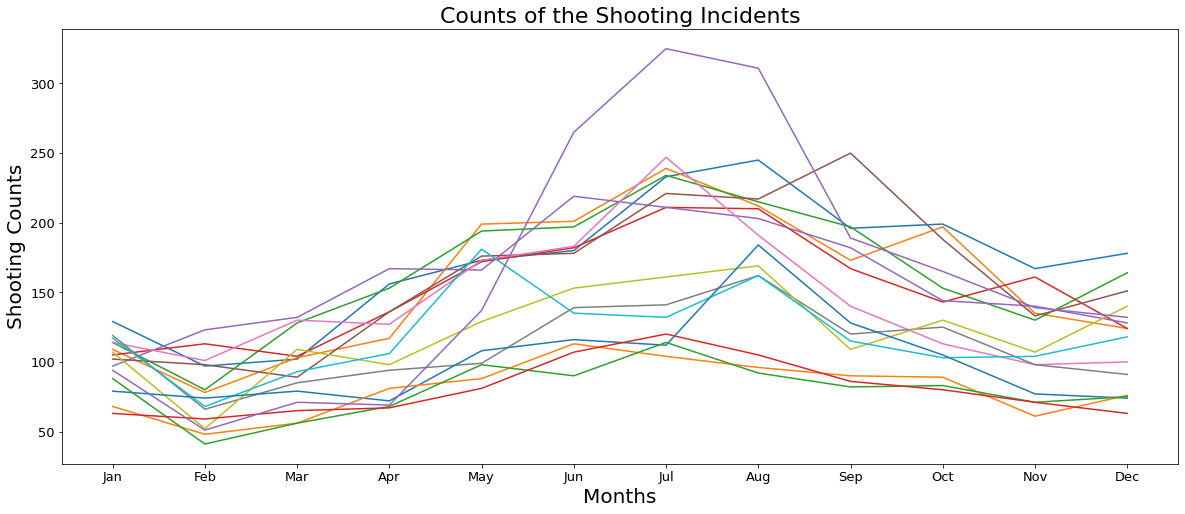

In [25]:
#Line Plot:

plt.figure(figsize = (20,8))

plt.plot(monthlychange)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Shooting Counts', fontsize = 20)
plt.title('Counts of the Shooting Incidents', fontsize = 22)
plt.xticks (size = 13)
plt.yticks (size = 13)

plt.xticks(np.arange(1,13),calendar.month_abbr[1:13])

plt.show()

### Creating a cross tabulation to show the five boroughs in NYC with year and month.

In [26]:
#Crosstab:

ctb_boroughs = pd.crosstab( columns = NYPD['BORO'],
           index = [NYPD.index.year, NYPD.index.month],
                           rownames = ['Year', 'Month'], 
                           colnames= ['Boroughs'])

ctb_boroughs

Boroughs    BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
Year Month                                                   
2006 1         40        49         16      18              6
     2         22        34         16      23              2
     3         27        48         14       9              4
     4         46        54         20      29              7
     5         46        80         27      18              2
...           ...       ...        ...     ...            ...
2020 8         91       135         29      51              5
     9         45        84         22      32              6
     10        46        62         25      31              1
     11        37        62         15      19              6
     12        32        52         24      22              2

[180 rows x 5 columns]

### Strip Plot: monthly shooting incidents in the five New York boroughs

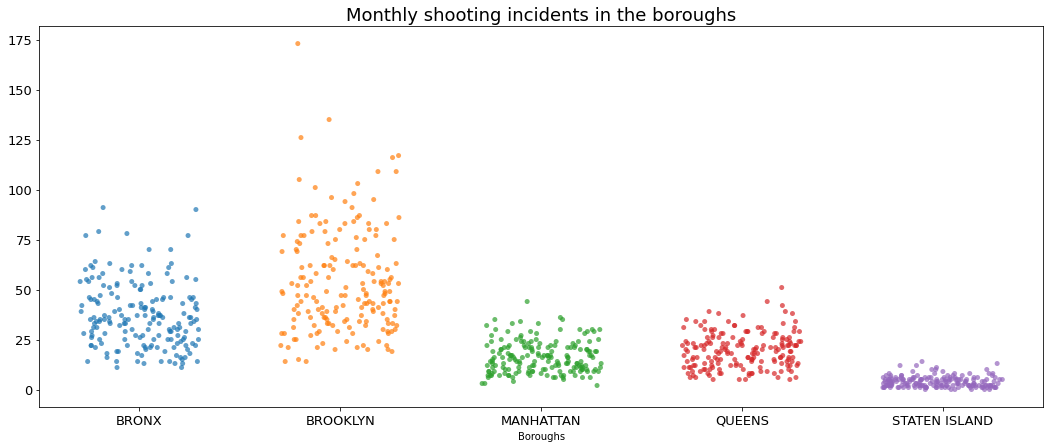

In [27]:
plt.figure(figsize = (18,7))
sns.stripplot ( data = ctb_boroughs, jitter = 0.3, alpha = .7)
plt.xticks (size = 13)
plt.yticks (size = 13)
plt.title('Monthly shooting incidents in the boroughs', fontsize = 18)
plt.show()

### Creating a cross tabulation with day of the week along with year and month.

In [28]:
#Crosstab:

ctb_day = pd.crosstab( columns = NYPD['Day'],
           index = [NYPD.index.year, NYPD.index.month],
                     rownames = ['Year', 'Month'], 
                           colnames= ['Days'])

ctb_day

Days        Fri  Mon  Sat  Sun  Thu  Tue  Wed
Year Month                                   
2006 1       13   23   16   30   16   18   13
     2       18    6   19   21    6   12   15
     3       17   16   19   16   19    9    6
     4       27   22   30   30   20   14   13
     5       19   28   23   38   19   21   25
...         ...  ...  ...  ...  ...  ...  ...
2020 8       45   50   69   68   25   23   31
     9       21   25   26   28   26   32   31
     10      20   23   29   20   24   21   28
     11      21   17   20   32   19   16   14
     12      28   20   18   21   12   18   15

[180 rows x 7 columns]

In [29]:
#List of days in order:

dayorder = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

### Strip Plot: monthly counts of shooting incidents change in different days of the week

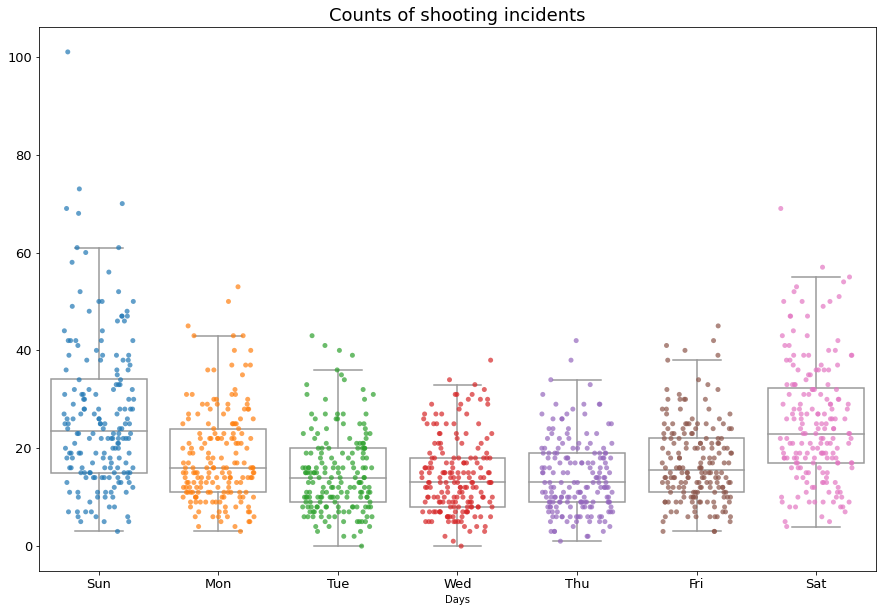

In [30]:
#Seaborn Strip Plot:

plt.figure(figsize = (15,10))
sns.stripplot ( data = ctb_day, jitter = 0.3, alpha = .7, order = dayorder)
sns.boxplot(data = ctb_day, color='white', order = dayorder, fliersize=0)
plt.xticks (size = 13)
plt.yticks (size = 13)
plt.title('Counts of shooting incidents', fontsize = 18)
plt.show()

## Creating a cross tabulation with the quarterly counts of shooting incidents change at different time of the day:

In [31]:
ctb_time = pd.crosstab( columns = NYPD.index.hour,
           index = [NYPD.index.year, NYPD.index.quarter],
                      rownames = ['Year', 'Quarter'], 
                           colnames= ['Hour'])

ctb_time

Hour          0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
Year Quarter                                          ...                       
2006 1        21  25  22  31   8  17   2   4   2   2  ...  12  14  18   9  10   
     2        35  30  24  28  25   8   9   3   6   3  ...  22  14   9  16  39   
     3        53  64  48  47  48  25   3   7   4   0  ...  15  23  25  16  23   
     4        33  36  31  24  44  14   6   6   3   9  ...   8  15   8  33  31   
2007 1        19  22  17  27  15   5   5   1   3   2  ...   9  15   7   8  21   
     2        57  47  31  25  20  15   6   6   2   4  ...  24  16  25  18  15   
     3        55  58  53  43  37  16   3   4   0   2  ...  10  10  16  19  22   
     4        25  39  38  44  21  13   6   5   4   3  ...  15  16   9  14  26   
2008 1        25  15  15  25  22  13   9   2   5   7  ...  12  11   7  10  18   
     2        40  42  43  35  24  17   6  11   1   0  ...  19  21  33  14  23   
     3        76  77  53  42  34  18  12   1   8   3  ...  11  14   8  20  20   
     4        28  29  20  30  21   8  10   3   4   7  ...   5  16   7  16  27   
2009 1        22  27  23  28  17  10   1   2   4   2  ...   2   9  21  11  20   
     2        45  41  29  22  30  12   2   5   0   3  ...  15  16  18  12  16   
     3        63  57  46  27  53  18   8   5   4   4  ...  13  29  18  22   3   
     4        22  32  20  21  30  10   3   3  12   3  ...  13  25  14  21  11   
2010 1        26  26  13  19  37  13  12   0   2   0  ...  22   6  19   8  16   
     2        39  47  66  53  31   9   3   1   3   0  ...   6  24  17  12  23   
     3        63  69  65  42  34  20   7   4   1   2  ...   9   7  17  13  26   
     4        33  35  32  32  18  12   3   3   4   3  ...   5   9  18  13  28   
2011 1        12  24  30  13  18  11   2   1   0   3  ...   6  14  15  19  16   
     2        31  31  29  32  30  13   4   2   0   1  ...  11  14  20  29  19   
     3        64  65  65  67  26  11  10   2   2   2  ...  11  18  17  35  21   
     4        31  43  37  21  33   8   4   8   7   4  ...  19  25  26  18  27   
2012 1        27  12  15  24  20  13   5   6   2   2  ...  21  10  16  19  19   
     2        52  47  52  38  28  11   2   5   2   5  ...   7  11  14  10  22   
     3        55  64  59  35  26  19  10   1   3   1  ...  13   7  12  13  29   
     4        25  12  27  22  12   3   3   6   5   5  ...   6  11  14  13  16   
2013 1        28  13  14  17  22   6   4   3   2   7  ...   7   7  13  12  12   
     2        26  33  16  18  21   6   5   0   4   3  ...  10  14  12  18  22   
     3        43  33  35  45  28  19   3   2   2   1  ...  13   8  13  13  13   
     4        24  22  21  21  19   5   6   1   5   3  ...   4  14  13  11  10   
2014 1        13  16  15   7  20   8   5   0   3   6  ...  10  15  21  28  14   
     2        30  33  28  18  21   6   8   4   5   3  ...  10  12  15  12  28   
     3        35  39  33  29  14  23   9   3   1   2  ...  17  14  23  18  14   
     4        33  19   7  13  27  11   2   0  10   8  ...  22  12  23  35  29   
2015 1        15  24  10  15  15  12   3   4   1   2  ...  14  14  15  19  11   
     2        29  19  30  15  24   7   5   0   7   5  ...  18  18  14  25  15   
     3        44  54  23  21  14  16   6   4   6   4  ...   5   9  14   7  16   
     4        14  24  13  10  20   6  15   7   1   8  ...   9  13  18  20  15   
2016 1        20  12  12  10   8   1   1   2   3   4  ...  11   6   8  12   9   
     2        23  20  21  18  14   9   4   2   1   1  ...  14   9  11   6   6   
     3        32  39  40  34  24   8   4   6   3   3  ...   8   7  11  12  13   
     4        21  26  11   8  18   3   3   2   0   3  ...  12  10   7   5  17   
2017 1         3   4   6  18   4   3   1   3   1   0  ...  11  11   6  16  19   
     2        26  21  10  22  12   5   1   1   7   2  ...  20   3  19   5  13   
     3        33  16  17  24  16   8   2   0   2   0  ...   7   7   8  11   7   
     4        21  10   9   7  1

### Strip Plot: quarterly counts of shooting incidents change at different time of the day

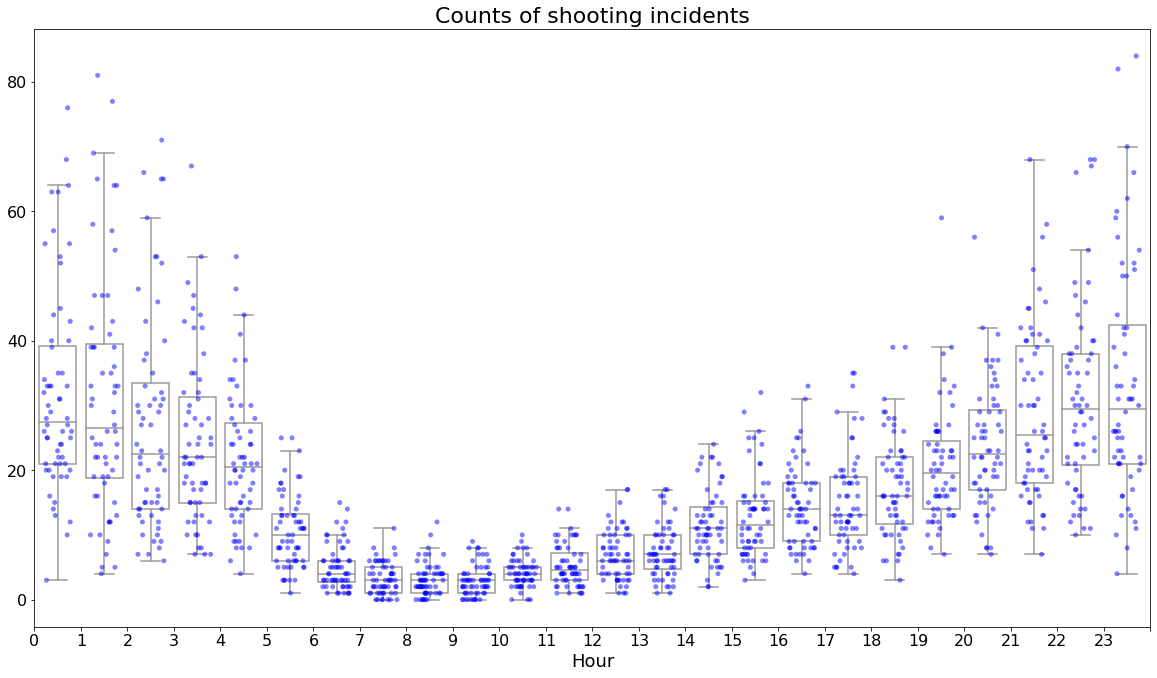

In [32]:
plt.figure(figsize = (20,11))
sns.stripplot ( data = ctb_time, jitter = 0.3, alpha = .5, color= 'blue')
sns.boxplot(data = ctb_time, color='white', fliersize=0)
plt.xticks (np.arange(-0.5,24), size = 16)
plt.yticks (size = 16)
plt.title('Counts of shooting incidents', fontsize = 22)
plt.xlabel('Hour', fontsize = 18)
plt.show()


## Thank You!
---